📊 Descripción de columnas con puntuaciones y su posible interpretación


| **Columna**                   | **Tipo**          | **Rango / Valores** | **Significado de los puntajes**                                |
| ----------------------------- | ----------------- | ------------------- | -------------------------------------------------------------- |
| `Avg_Daily_Usage_Hours`       | Numérica (float)  | 1.5 – 8.5 horas     | Cuántas horas usa redes sociales diariamente (autorreportado). |
| `Sleep_Hours_Per_Night`       | Numérica (float)  | 3.8 – 9.6 horas     | Horas promedio de sueño cada noche.                            |
| `Mental_Health_Score`         | Numérica (entero) | 4 – 9               | Nivel de salud mental percibida (mayor = mejor salud mental).  |
| `Conflicts_Over_Social_Media` | Numérica (entero) | 0 – 5               | Cantidad de conflictos generados por redes sociales.           |
| `Addicted_Score`              | Numérica (entero) | 2 – 9               | Nivel de adicción a redes sociales. Mayor = más adicción.      |


🎯 Interpretación de puntajes clave

Addicted_Score:

Rango 2 a 9. Probablemente basado en una escala de respuestas tipo Likert (por ejemplo, 1–3 = bajo, 4–6 = moderado, 7–9 = alto nivel de adicción).

Mental_Health_Score:

Rango 4 a 9. Puede reflejar percepción de bienestar mental. Puntajes bajos indicarían problemas potenciales.

Conflicts_Over_Social_Media:

Rango 0 a 5. Podría interpretarse como número de conflictos personales o familiares relacionados con redes.

🧠 Variables cualitativas relacionadas

| **Columna**                    | **Valores posibles**                           | **Uso recomendado en análisis**                                         |
| ------------------------------ | ---------------------------------------------- | ----------------------------------------------------------------------- |
| `Gender`                       | "Male", "Female"                               | Comparar adicción, salud mental, horas de sueño, etc.                   |
| `Academic_Level`               | "High School", "Undergraduate", "Graduate"     | Ver diferencias por nivel educativo.                                    |
| `Country`                      | 110 países distintos                           | Segmentar si es necesario o agrupar por regiones.                       |
| `Most_Used_Platform`           | Instagram, TikTok, YouTube, etc. (12 opciones) | Analizar cuál plataforma predomina y cómo se relaciona con la adicción. |
| `Affects_Academic_Performance` | "Yes", "No"                                    | Relacionar con uso diario, adicción y salud mental.                     |
| `Relationship_Status`          | "Single", "In Relationship", "Complicated"     | Analizar si afecta la adicción o los conflictos.                        |


# **Paso 1: Carga de datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

#Load the dataset
# Reemplaza 'ruta/a/tu/archivo.csv' con la ruta real de tu archivo en Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/documents/Students Social Media Addiction.csv'
df_from_drive = pd.read_csv(file_path)
#show the basic information of the data
df_from_drive.info()

# Muestra las primeras filas del DataFrame para verificar la carga
print(df_from_drive.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 

## **Paso 2: Exploración inicial**

In [ ]:
df_from_drive.head(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [ ]:
df_from_drive.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [ ]:
df_from_drive.shape

(705, 13)

In [ ]:
df_from_drive.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Academic_Level,object
Country,object
Avg_Daily_Usage_Hours,float64
Most_Used_Platform,object
Affects_Academic_Performance,object
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64


In [ ]:
df_from_drive.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [ ]:
df_from_drive.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


### **Paso 3: Limpieza de datos**

In [ ]:
df_from_drive.isnull

<bound method DataFrame.isnull of      Student_ID  Age  Gender Academic_Level     Country  \
0             1   19  Female  Undergraduate  Bangladesh   
1             2   22    Male       Graduate       India   
2             3   20  Female  Undergraduate         USA   
3             4   18    Male    High School          UK   
4             5   21    Male       Graduate      Canada   
..          ...  ...     ...            ...         ...   
700         701   20  Female  Undergraduate       Italy   
701         702   23    Male       Graduate      Russia   
702         703   21  Female  Undergraduate       China   
703         704   24    Male       Graduate       Japan   
704         705   19  Female  Undergraduate      Poland   

     Avg_Daily_Usage_Hours Most_Used_Platform Affects_Academic_Performance  \
0                      5.2          Instagram                          Yes   
1                      2.1            Twitter                           No   
2                      6.0             TikTok                          Yes   
3                      3.0            YouTube                           No   
4                      4.5           Facebook                          Yes   
..                     ...                ...                          ...   
700                    4.7             TikTok                           No   
701                    6.8          Instagram                          Yes   
702                    5.6             WeChat                          Yes   
703                    4.3            Twitter                           No   
704                    6.2           Facebook                          Yes   

     Sleep_Hours_Per_Night  Mental_Health_Score Relationship_Status  \
0                      6.5                    6     In Relationship   
1                      7.5                    8              Single   
2                      5.0                    5         Complicated   
3                      7.0                    7              Single   
4                      6.0                    6     In Relationship   
..                     ...                  ...                 ...   
700                    7.2                    7     In Relationship   
701                    5.9                    4              Single   
702                    6.7                    6     In Relationship   
703                    7.5                    8              Single   
704                    6.3                    5              Single   

     Conflicts_Over_Social_Media  Addicted_Score  
0                              3               8  
1                              0               3  
2                              4               9  
3                              1               4  
4                              2               7  
..                           ...             ...  
700                            2               5  
701                            5               9  
702                            3               7  
703                            2               4  
704                            4               8  

[705 rows x 13 columns]>

In [ ]:
df_from_drive.column=df_from_drive.columns.str.strip().str.lower().str.replace("","_")

/tmp/ipython-input-9-1180221315.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_from_drive.column=df_from_drive.columns.str.strip().str.lower().str.replace("","_")


In [ ]:
df_from_drive.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

### **🔹 Paso 4: Análisis descriptivo**

Analiza cada variable:

- Edad promedio, mínimo y máximo.

- Promedio de horas de uso, sueño, salud mental.

- Conteo por género, país, plataforma, nivel académico.

In [ ]:
df_from_drive['Age'].describe()

,Age
count,705.000000
mean,20.659574
std,1.399217
min,18.000000
25%,19.000000
50%,21.000000
75%,22.000000
max,24.000000


✔ **Filtra columnas numéricas (select_dtypes(include='number')) para evitar errores con texto.**

✔ **Calcula los promedios con .mean() y los asigna a una nueva fila con df_from_drive.loc['Promedio'].**

✔ **Evita promediar valores de ID (Student_ID), ya que no son representativos.**


In [ ]:
# Calcular promedios SOLO para columnas numéricas
numeric_columns = df_from_drive.select_dtypes(include='number')
max_row = numeric_columns.max()
min_row = numeric_columns.min()
average_row = numeric_columns.mean()
# Agregar la fila de promedios al DataFrame
df_from_drive.loc["Maximo"] = max_row
df_from_drive.loc['Minimo'] = min_row
df_from_drive.loc['Promedio'] = average_row
df_from_drive

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1.0,19.000000,Female,Undergraduate,Bangladesh,5.200000,Instagram,Yes,6.500000,6.00000,In Relationship,3.000000,8.000000
1,2.0,22.000000,Male,Graduate,India,2.100000,Twitter,No,7.500000,8.00000,Single,0.000000,3.000000
2,3.0,20.000000,Female,Undergraduate,USA,6.000000,TikTok,Yes,5.000000,5.00000,Complicated,4.000000,9.000000
3,4.0,18.000000,Male,High School,UK,3.000000,YouTube,No,7.000000,7.00000,Single,1.000000,4.000000
4,5.0,21.000000,Male,Graduate,Canada,4.500000,Facebook,Yes,6.000000,6.00000,In Relationship,2.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,704.0,24.000000,Male,Graduate,Japan,4.300000,Twitter,No,7.500000,8.00000,Single,2.000000,4.000000
704,705.0,19.000000,Female,Undergraduate,Poland,6.200000,Facebook,Yes,6.300000,5.00000,Single,4.000000,8.000000
Maximo,705.0,24.000000,NaN,NaN,NaN,8.500000,NaN,NaN,9.600000,9.00000,NaN,5.000000,9.000000
Minimo,1.0,18.000000,NaN,NaN,NaN,1.500000,NaN,NaN,3.800000,4.00000,NaN,0.000000,2.000000


In [ ]:
df_from_drive['Gender'].value_counts()

,count
Gender,
Female,353
Male,352


In [ ]:
df_from_drive['Sleep_Hours_Per_Night'].mean()

np.float64(6.868458949392956)

In [ ]:
df_from_drive['Mental_Health_Score'].mean()

np.float64(6.227721681291823)

In [ ]:
df_from_drive.corr

<bound method DataFrame.corr of           Student_ID        Age  Gender Academic_Level     Country  \
0                1.0  19.000000  Female  Undergraduate  Bangladesh   
1                2.0  22.000000    Male       Graduate       India   
2                3.0  20.000000  Female  Undergraduate         USA   
3                4.0  18.000000    Male    High School          UK   
4                5.0  21.000000    Male       Graduate      Canada   
...              ...        ...     ...            ...         ...   
703            704.0  24.000000    Male       Graduate       Japan   
704            705.0  19.000000  Female  Undergraduate      Poland   
Maximo         705.0  24.000000     NaN            NaN         NaN   
Minimo           1.0  18.000000     NaN            NaN         NaN   
Promedio       353.0  20.659574     NaN            NaN         NaN   

          Avg_Daily_Usage_Hours Most_Used_Platform  \
0                      5.200000          Instagram   
1                      2.100000            Twitter   
2                      6.000000             TikTok   
3                      3.000000            YouTube   
4                      4.500000           Facebook   
...                         ...                ...   
703                    4.300000            Twitter   
704                    6.200000           Facebook   
Maximo                 8.500000                NaN   
Minimo                 1.500000                NaN   
Promedio               4.918723                NaN   

         Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0                                 Yes               6.500000   
1                                  No               7.500000   
2                                 Yes               5.000000   
3                                  No               7.000000   
4                                 Yes               6.000000   
...                               ...                    ...   
703                                No               7.500000   
704                               Yes               6.300000   
Maximo                            NaN               9.600000   
Minimo                            NaN               3.800000   
Promedio                          NaN               6.868936   

          Mental_Health_Score Relationship_Status  \
0                     6.00000     In Relationship   
1                     8.00000              Single   
2                     5.00000         Complicated   
3                     7.00000              Single   
4                     6.00000     In Relationship   
...                       ...                 ...   
703                   8.00000              Single   
704                   5.00000              Single   
Maximo                9.00000                 NaN   
Minimo                4.00000                 NaN   
Promedio              6.22695                 NaN   

          Conflicts_Over_Social_Media  Addicted_Score  
0                            3.000000        8.000000  
1                            0.000000        3.000000  
2                            4.000000        9.000000  
3                            1.000000        4.000000  
4                            2.000000        7.000000  
...                               ...             ...  
703                          2.000000        4.000000  
704                          4.000000        8.000000  
Maximo                       5.000000        9.000000  
Minimo                       0.000000        2.000000  
Promedio                     2.849645        6.436879  

[708 rows x 13 columns]>

**🔹 Paso 5: Análisis de relaciones entre variables**

In [ ]:
df_from_drive.head(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1.0,19.0,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6.0,In Relationship,3.0,8.0
1,2.0,22.0,Male,Graduate,India,2.1,Twitter,No,7.5,8.0,Single,0.0,3.0
2,3.0,20.0,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5.0,Complicated,4.0,9.0
3,4.0,18.0,Male,High School,UK,3.0,YouTube,No,7.0,7.0,Single,1.0,4.0
4,5.0,21.0,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6.0,In Relationship,2.0,7.0
5,6.0,19.0,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4.0,Complicated,5.0,9.0
6,7.0,23.0,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9.0,Single,0.0,2.0
7,8.0,20.0,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6.0,In Relationship,2.0,8.0
8,9.0,18.0,Male,High School,Japan,4.0,TikTok,No,6.5,7.0,Single,1.0,5.0
9,10.0,21.0,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7.0,In Relationship,1.0,4.0


🔹 1. Correlación (entre variables numéricas):

✅ ¿Cuándo usarlo?
Cuando ambas variables son números continuos o enteros:

Addicted_Score vs Mental_Health_Score

Avg_Daily_Usage_Hours vs Sleep_Hours_Per_Night

✅ ¿Qué hace?
Mide la fuerza y dirección de la relación entre dos variables numéricas. Va de -1 a 1.

In [ ]:
correlation = df_from_drive.corr(numeric_only=True)
correlation["Addicted_Score"]

,Addicted_Score
Student_ID,0.051861
Age,-0.151251
Avg_Daily_Usage_Hours,0.833980
Sleep_Hours_Per_Night,-0.736090
Mental_Health_Score,-0.917747
Conflicts_Over_Social_Media,0.934417
Addicted_Score,1.000000


🔹 2. Tablas cruzadas (entre variables categóricas)

✅ ¿Qué hace?
Muestra cómo se distribuyen categorías en relación con otras.

✅ ¿Cuándo usarlo?
Cuando ambas variables son categóricas:

Gender vs Most_Used_Platform

Academic_Level vs Affects_Academic_Performance

In [ ]:
pd.crosstab(df_from_drive["Gender"],df_from_drive["Most_Used_Platform"], normalize="index")*100

Most_Used_Platform,Facebook,Instagram,KakaoTalk,LINE,LinkedIn,Snapchat,TikTok,Twitter,VKontakte,WeChat,WhatsApp,YouTube
Gender,,,,,,,,,,,,
Female,6.798867,48.725212,3.399433,3.399433,2.266289,2.266289,24.362606,4.532578,0.000000,1.133144,3.116147,0.000000
Male,28.125000,21.875000,0.000000,0.000000,3.693182,1.420455,19.318182,3.977273,3.409091,3.125000,12.215909,2.840909


In [ ]:
pd.crosstab(df_from_drive["Academic_Level"],df_from_drive["Affects_Academic_Performance"],normalize="index")*100

Affects_Academic_Performance,No,Yes
Academic_Level,,
Graduate,38.769231,61.230769
High School,7.407407,92.592593
Undergraduate,35.127479,64.872521


🔹 3. Agrupar y comparar (groupby):

✅ ¿Cuándo usarlo?
Cuando quieres comparar valores numéricos entre categorías:

Promedio de adicción por género.

Salud mental por nivel académico.

In [ ]:
df_from_drive.groupby('Academic_Level')['Addicted_Score'].mean()

,Addicted_Score
Academic_Level,
Graduate,6.243077
High School,8.037037
Undergraduate,6.492918


In [ ]:
df_from_drive.groupby('Most_Used_Platform')[['Addicted_Score', 'Sleep_Hours_Per_Night']].mean()

,Addicted_Score,Sleep_Hours_Per_Night
Most_Used_Platform,,
Facebook,5.666667,7.360163
Instagram,6.554217,7.021285
KakaoTalk,6.000000,7.050000
LINE,3.000000,8.350000
LinkedIn,3.809524,7.285714
Snapchat,7.461538,5.707692
TikTok,7.428571,6.362987
Twitter,5.500000,7.106667
VKontakte,5.000000,7.750000


## **🧩 Interpretación de los valores**

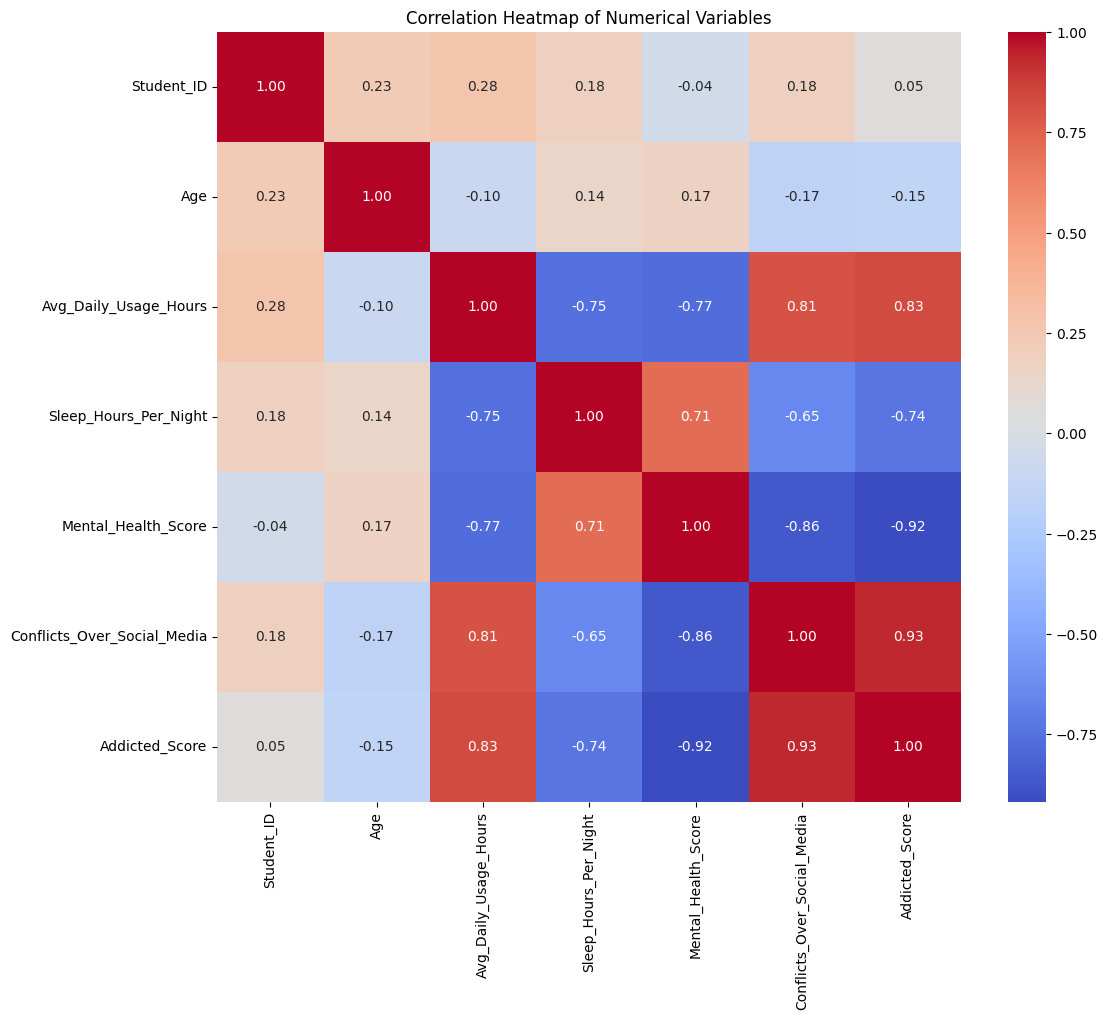

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_from_drive.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

🔹 Paso 6: Visualización
Gráficos de barras: uso por plataforma, por género.

Histogramas: distribución de edad, sueño, salud mental.

Boxplots: comparar sueño vs adicción.

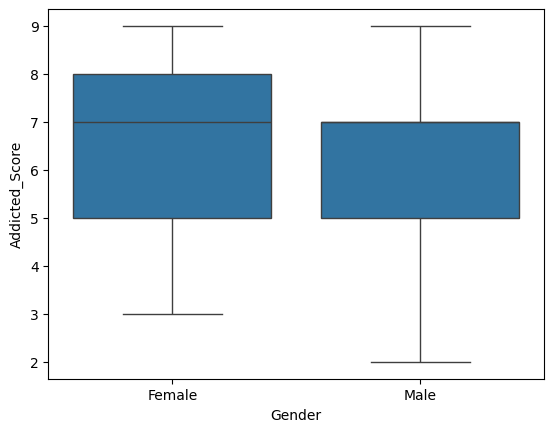

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Gender', y='Addicted_Score', data=df_from_drive)
plt.show()

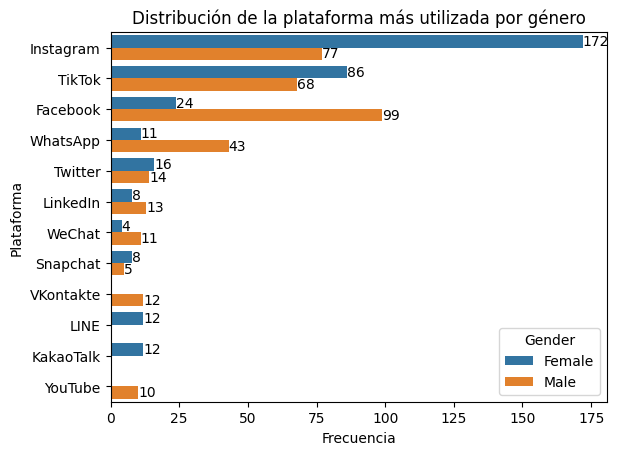

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(y='Most_Used_Platform', hue='Gender', data=df_from_drive, order=df_from_drive['Most_Used_Platform'].value_counts().index)
plt.title('Distribución de la plataforma más utilizada por género')
plt.xlabel('Frecuencia')
plt.ylabel('Plataforma')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

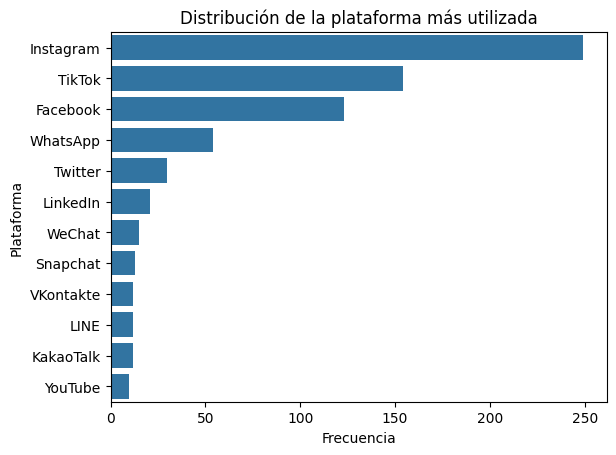

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Most_Used_Platform', data=df_from_drive, order=df_from_drive['Most_Used_Platform'].value_counts().index)
plt.title('Distribución de la plataforma más utilizada')
plt.xlabel('Frecuencia')
plt.ylabel('Plataforma')
plt.show()

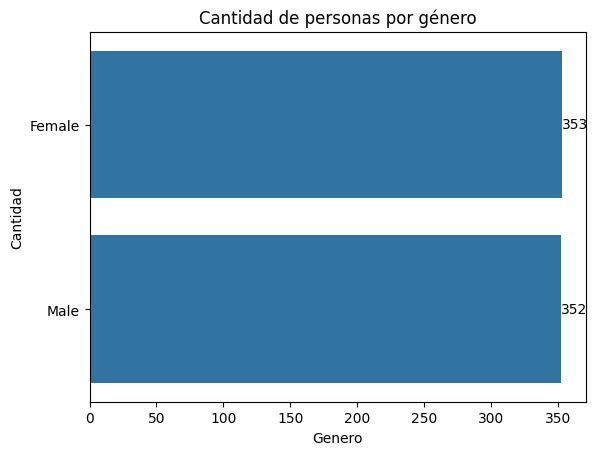

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(y='Gender', data=df_from_drive, order=df_from_drive['Gender'].value_counts().index)
plt.title('Cantidad de personas por género')
plt.xlabel('Genero')
plt.ylabel('Cantidad')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

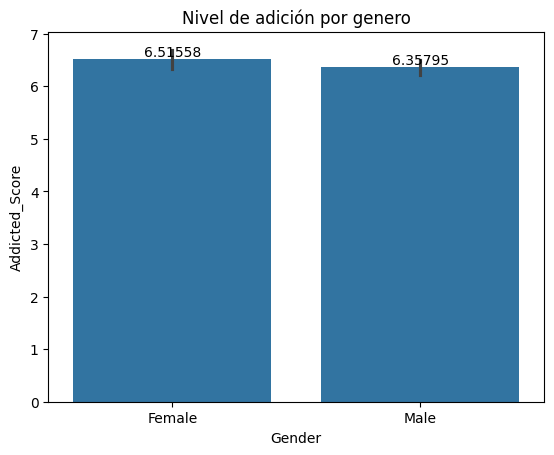

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x="Gender", y="Addicted_Score", data=df_from_drive)
plt.title("Nivel de adición por genero")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

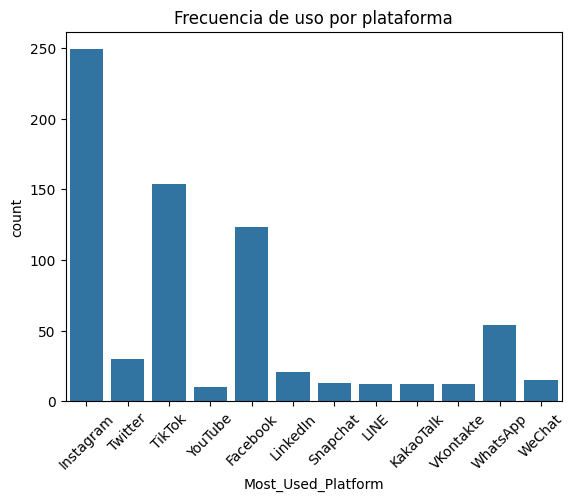

In [ ]:
sns.countplot(x="Most_Used_Platform", data=df_from_drive)
plt.xticks(rotation=45)
plt.title("Frecuencia de uso por plataforma")
plt.show()

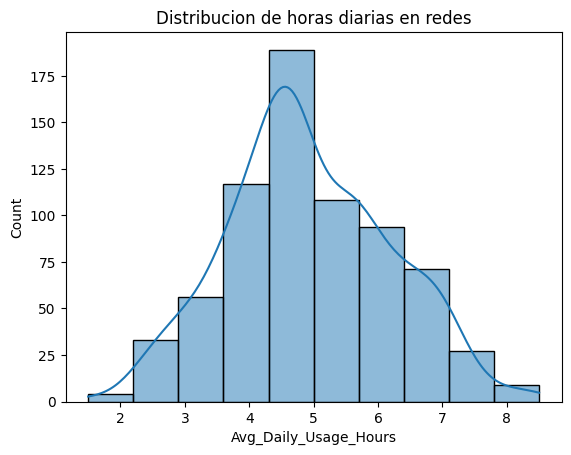

In [ ]:
sns.histplot(df_from_drive['Avg_Daily_Usage_Hours'], bins=10, kde=True)
plt.title("Distribucion de horas diarias en redes")
plt.show()

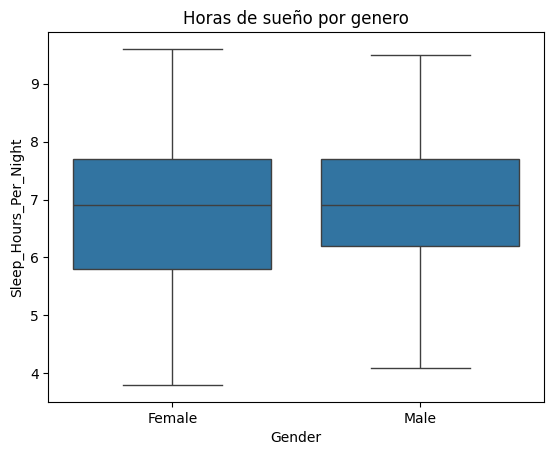

In [ ]:
sns.boxplot(x='Gender', y="Sleep_Hours_Per_Night", data=df_from_drive)
plt.title("Horas de sueño por genero")
plt.show()

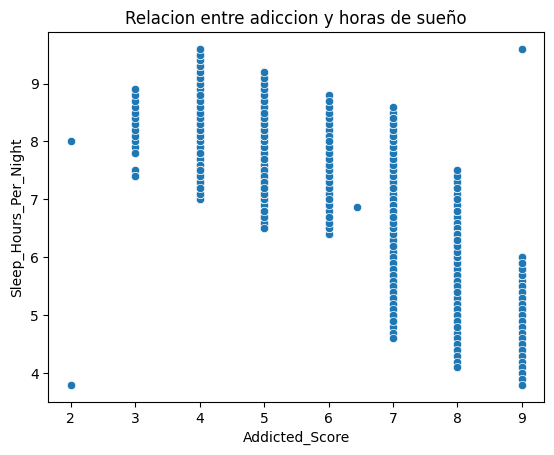

In [ ]:
sns.scatterplot(x="Addicted_Score",y="Sleep_Hours_Per_Night", data=df_from_drive)
plt.title("Relacion entre adiccion y horas de sueño")
plt.show()

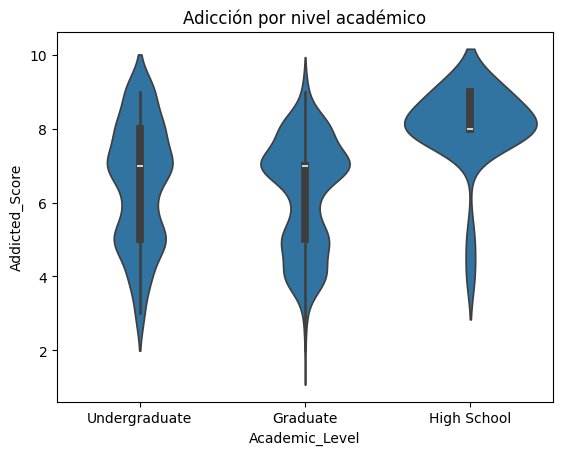

In [ ]:
sns.violinplot(x='Academic_Level', y='Addicted_Score', data=df_from_drive)
plt.title('Adicción por nivel académico')
plt.show()
